# Import Libraries

In [1]:
#Import Required Python Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.svm import SVC
import pickle
from pickle import dump

# Import Processed Data

In [2]:
df = pd.read_csv('Processed_drugcom.csv')
df

,Unnamed: 0,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,...,neg_senti_score,neu_senti_score,pos_senti_score,compound,Sentiment_Vader_Compound,sentiment_spacy_score,sentiment_spacy,no_chars,no_words,pos_tags_words
0,0,69,0,"""Gave me terrible headaches.""",1.0,2009-11-30,2,1,gave me terrible headaches,30,...,0.508,0.492,0.000,-0.4767,Negative,-2,Negative,25,4,give terrible
1,1,90,0,"""Horrible drug. Didn&#039;t help me with depre...",1.0,2016-02-28,16,1,horrible drug didnt help me with depression ma...,28,...,0.423,0.387,0.190,-0.7650,Negative,-4,Negative,96,19,horrible didn make even worse
2,2,55,2,"""Was put on bystolic for high blood pressure i...",1.0,2017-10-26,7,1,was put on bystolic for high blood pressure in...,26,...,0.175,0.811,0.014,-0.9493,Negative,-6,Negative,549,108,be put high be horrible be only once be intole...
3,3,306,1,"""Was on .75 for a month as suppose to boost th...",1.0,2017-09-20,5,1,was on for a month as suppose to boost this u...,20,...,0.075,0.834,0.091,0.2212,Positive,-6,Negative,556,125,be boost up be not bad weight now then start g...
4,4,234,0,"""Gave me restless, crawly legs on 50mg. It was...",1.0,2013-02-14,62,1,gave me restless crawly legs on mg it was very...,14,...,0.151,0.849,0.000,-0.7783,Negative,-3,Negative,240,48,give restless crawly legs be very sedate ago b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,13939,275,0,"""This medication works great for depression, e...",10.0,2014-12-04,45,5,this medication works great for depression eve...,4,...,0.292,0.626,0.083,-0.9191,Negative,0,Neutral,237,44,great even lower generally make happier only f...
13940,13940,258,0,"""Quetiapine 25mg used to get over Post traumat...",10.0,2012-12-16,31,5,quetiapine mg used to get over post traumatic ...,16,...,0.341,0.659,0.000,-0.8979,Negative,-5,Negative,158,28,get traumatic mental valium presently take
13941,13941,332,0,"""Zoloft has been a life saver for me. I honest...",10.0,2014-12-25,247,5,zoloft has been a life saver for me i honestly...,25,...,0.136,0.653,0.212,0.6219,Positive,-4,Negative,346,69,have be i honestly don know i past i have i st...
13942,13942,32,2,"""Works well for me along with spironolactone. ...",10.0,2013-04-28,32,5,works well for me along with spironolactone ac...,28,...,0.000,0.700,0.300,0.7717,Positive,4,Positive,115,22,well actually think s good facial keep smooth


In [3]:
df.head(5)

,Unnamed: 0,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,...,neg_senti_score,neu_senti_score,pos_senti_score,compound,Sentiment_Vader_Compound,sentiment_spacy_score,sentiment_spacy,no_chars,no_words,pos_tags_words
0,0,69,0,"""Gave me terrible headaches.""",1.0,2009-11-30,2,1,gave me terrible headaches,30,...,0.508,0.492,0.000,-0.4767,Negative,-2,Negative,25,4,give terrible
1,1,90,0,"""Horrible drug. Didn&#039;t help me with depre...",1.0,2016-02-28,16,1,horrible drug didnt help me with depression ma...,28,...,0.423,0.387,0.190,-0.7650,Negative,-4,Negative,96,19,horrible didn make even worse
2,2,55,2,"""Was put on bystolic for high blood pressure i...",1.0,2017-10-26,7,1,was put on bystolic for high blood pressure in...,26,...,0.175,0.811,0.014,-0.9493,Negative,-6,Negative,549,108,be put high be horrible be only once be intole...
3,3,306,1,"""Was on .75 for a month as suppose to boost th...",1.0,2017-09-20,5,1,was on for a month as suppose to boost this u...,20,...,0.075,0.834,0.091,0.2212,Positive,-6,Negative,556,125,be boost up be not bad weight now then start g...
4,4,234,0,"""Gave me restless, crawly legs on 50mg. It was...",1.0,2013-02-14,62,1,gave me restless crawly legs on mg it was very...,14,...,0.151,0.849,0.000,-0.7783,Negative,-3,Negative,240,48,give restless crawly legs be very sedate ago b...


In [4]:
df = df.drop("Unnamed: 0",axis=1)

In [5]:
df.head()

,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,...,neg_senti_score,neu_senti_score,pos_senti_score,compound,Sentiment_Vader_Compound,sentiment_spacy_score,sentiment_spacy,no_chars,no_words,pos_tags_words
0,69,0,"""Gave me terrible headaches.""",1.0,2009-11-30,2,1,gave me terrible headaches,30,11,...,0.508,0.492,0.000,-0.4767,Negative,-2,Negative,25,4,give terrible
1,90,0,"""Horrible drug. Didn&#039;t help me with depre...",1.0,2016-02-28,16,1,horrible drug didnt help me with depression ma...,28,2,...,0.423,0.387,0.190,-0.7650,Negative,-4,Negative,96,19,horrible didn make even worse
2,55,2,"""Was put on bystolic for high blood pressure i...",1.0,2017-10-26,7,1,was put on bystolic for high blood pressure in...,26,10,...,0.175,0.811,0.014,-0.9493,Negative,-6,Negative,549,108,be put high be horrible be only once be intole...
3,306,1,"""Was on .75 for a month as suppose to boost th...",1.0,2017-09-20,5,1,was on for a month as suppose to boost this u...,20,9,...,0.075,0.834,0.091,0.2212,Positive,-6,Negative,556,125,be boost up be not bad weight now then start g...
4,234,0,"""Gave me restless, crawly legs on 50mg. It was...",1.0,2013-02-14,62,1,gave me restless crawly legs on mg it was very...,14,2,...,0.151,0.849,0.000,-0.7783,Negative,-3,Negative,240,48,give restless crawly legs be very sedate ago b...


# Data Preparation

In [6]:
x = df["review_clean"]
y = df["condition"]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# TF - IDF Vectorization

In [8]:
tf_idf = TfidfVectorizer(max_features=1000)
x_train_sparse = tf_idf.fit_transform(x_train)
x_train_df = pd.DataFrame(x_train_sparse.toarray(), columns=tf_idf.get_feature_names())
x_train_df.head()

,abilify,ability,able,about,above,absolutely,ac,aches,active,actos,...,yesterday,yet,you,your,yr,yrs,zaps,zero,zoloft,zombie
0,0.0,0.0,0.0,0.070263,0.0,0.14936,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.120753,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.144808,0.0,0.08022,0.103921,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
x_test_sparse = tf_idf.fit_transform(x_test)
x_test_df = pd.DataFrame(x_test_sparse.toarray(), columns=tf_idf.get_feature_names())
x_test_df.head()

,abilify,ability,able,about,absolutely,ac,aches,active,actos,actually,...,yes,yesterday,yet,you,your,yrs,zaps,zero,zoloft,zombie
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.065445,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
len(tf_idf.get_feature_names())

1000

In [11]:
x_train_df.shape,x_test_df.shape

((10458, 1000), (3486, 1000))

# Model Building / Model Evaluation / Model Testing
**Support Vector Machines - Classifier**

In [12]:
svm_model = SVC()

In [13]:
svm_model.fit(x_train_df,y_train)

SVC()

In [14]:
svm_pred_train=svm_model.predict(x_train_df)
svm_pred_test=svm_model.predict(x_test_df)
svm_train_acc=accuracy_score(svm_pred_train,y_train)
svm_test_acc=accuracy_score(svm_pred_test,y_test)
print('Training Accuracy : ',(svm_train_acc*100).round(2))
print('Testing Accuracy  : ',(svm_test_acc*100).round(2))

Training Accuracy :  99.36
Testing Accuracy  :  55.42


In [15]:
svm_f1_tr=f1_score(svm_pred_train,y_train,average='weighted')
svm_f1_t=f1_score(svm_pred_test,y_test,average='weighted')
print('Training F1 Score : ',(svm_f1_tr*100).round(2))
print('Testing F1 Score  : ',(svm_f1_t*100).round(2))

Training F1 Score :  99.36
Testing F1 Score  :  60.11


In [16]:
svm_train=pd.DataFrame.from_dict(classification_report(svm_pred_train,y_train,output_dict=True))
print('\033[1m'+'\nSVM - Training Data')
svm_train.round(2)


SVM - Training Data


,0,1,2,accuracy,macro avg,weighted avg
precision,1.00,0.99,0.98,0.99,0.99,0.99
recall,0.99,1.00,0.99,0.99,0.99,0.99
f1-score,1.00,0.99,0.99,0.99,0.99,0.99
support,6804.00,1910.00,1744.00,0.99,10458.00,10458.00


In [17]:
svm_test=pd.DataFrame.from_dict(classification_report(svm_pred_test,y_test,output_dict=True))[['0','1','2','weighted avg']]
print('\033[1m'+'\nSVM - Testing Data')
svm_test.round(2)


SVM - Testing Data


,0,1,2,weighted avg
precision,0.79,0.13,0.05,0.66
recall,0.64,0.19,0.12,0.55
f1-score,0.71,0.16,0.07,0.60
support,2834.00,443.00,209.00,3486.00



Confusion Matrix - SVM - Training Data


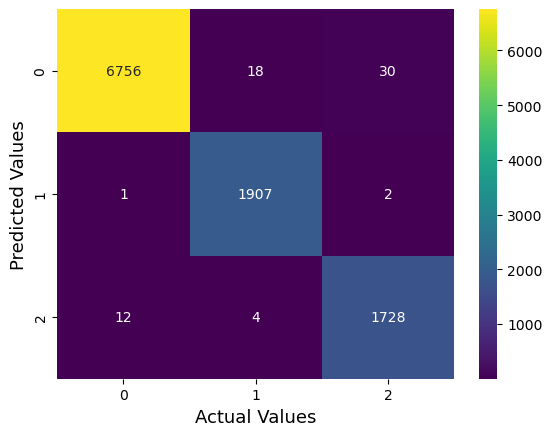

In [18]:
print('\033[1m'+'\nConfusion Matrix - SVM - Training Data')
sns.heatmap(confusion_matrix(svm_pred_train,y_train),
            annot=True,fmt='.0f',cmap="viridis",xticklabels=[0,1,2],yticklabels=[0,1,2])
plt.xlabel('Actual Values',size=13)
plt.ylabel('Predicted Values',size=13)
plt.show()


Confusion Matrix - SVM - Testing Data


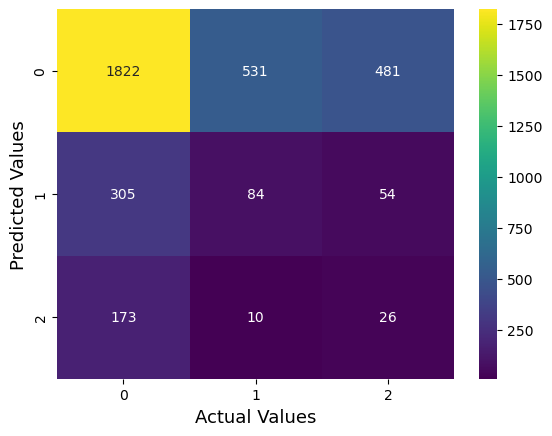

In [19]:
print('\033[1m'+'\nConfusion Matrix - SVM - Testing Data')
sns.heatmap(confusion_matrix(svm_pred_test,y_test),
            annot=True,fmt='.0f',cmap="viridis",xticklabels=[0,1,2],yticklabels=[0,1,2])
plt.xlabel('Actual Values',size=13)
plt.ylabel('Predicted Values',size=13)
plt.show()

# Deployment

In [20]:
#Build Intelligence for TfidfVectorizer by training with whole dataset(Cleaned/Lemmatized Review Column)
tf_idf_deploy = TfidfVectorizer()
tf_idf_deploy.fit(x)

TfidfVectorizer()

In [21]:
#Transform Text into Numerical data for Building SVM
X_sparse = tf_idf_deploy.transform(x)

In [22]:
#Build Intelligence for Logistic Regression Model by training converted numerical dataset from TfidfVectorizer function
svm_deploy = SVC(probability=True)
svm_deploy.fit(X_sparse,y)

SVC(probability=True)

In [23]:
text =["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]
test = tf_idf_deploy.transform(text)
pred1=svm_deploy.predict(test)[0]
pred1

2

In [24]:
text =["This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."]
test = tf_idf_deploy.transform(text)
pred1=svm_deploy.predict(test)[0]
pred1

0

In [25]:
text =["I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me"]
test = tf_idf_deploy.transform(text)
pred1=svm_deploy.predict(test)[0]
pred1

1

# Pickle File

In [26]:
#Saving Both SVM and TfidfVectorizer Intelligence into Pickle file for deployment
dump(obj=svm_deploy,file=open('svm_deploy.pkl','wb'))
dump(obj=tf_idf_deploy,file=open('tf_idf_deploy.pkl','wb'))

In [27]:
print('END')

END
